In [1]:
%matplotlib inline

import os
import glob
import json
import re
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

os.system("rm *.json")
os.system("rsync -avrz vnode-03:/home/students/c/h/chmura/tpr/1/*.json .")

0

In [2]:
files = sorted(glob.glob("*.json"))
print(files)

['1_shmem.json', '2_no_shmem.json', '3_same_machine.json', '4_different_machines.json']


# 1_shmem

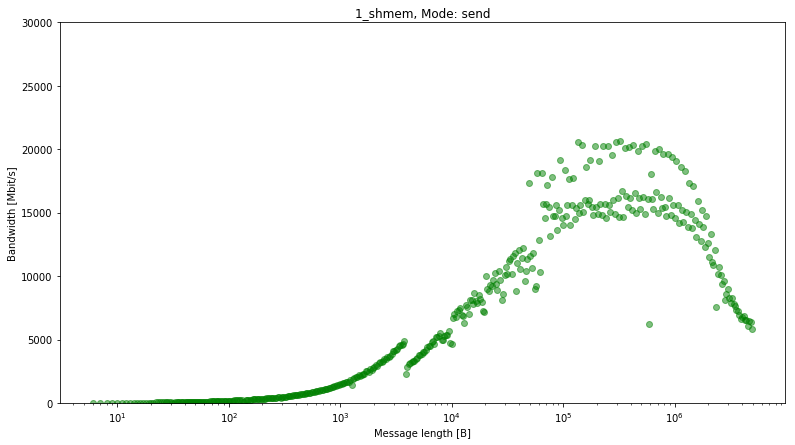

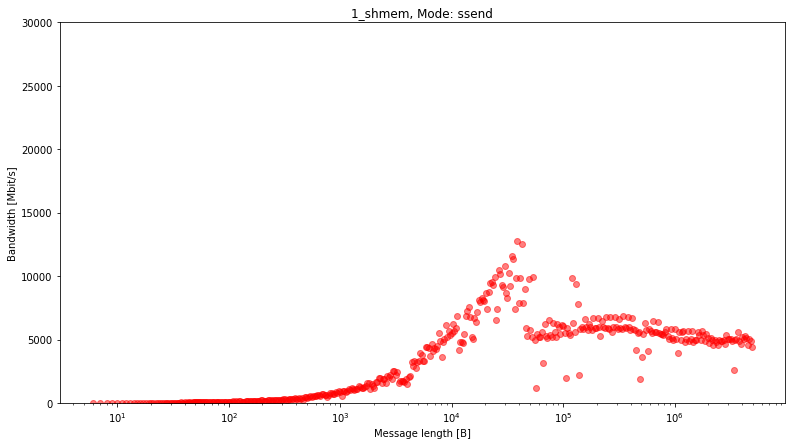

# 2_no_shmem

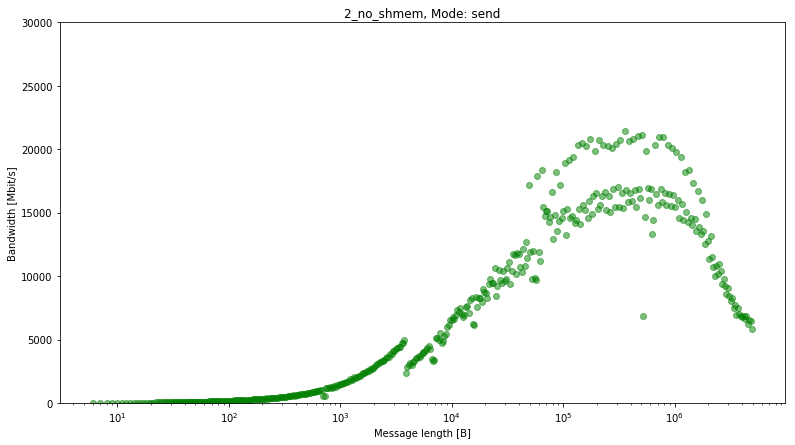

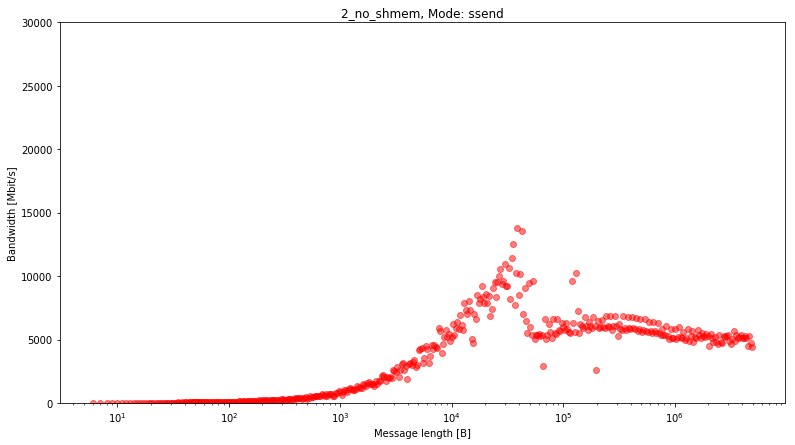

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [4]:
for file_name in files:
    with open(file_name, "r") as f:
        j = json.load(f)
        
        name = re.match(r"^(\w+)\.json$", file_name)[1]
        display(Markdown("# {}".format(name)))
        
        for mode, values in j.items():
            plt.figure(figsize=(13, 7))
            color = "green" if mode == "send" else "red"
            plt.scatter(values["x"], values["y"], alpha=0.5, c=color)
            
            plot_title = "{}, Mode: {}".format(name, mode)
            plt.title(plot_title)
            plt.gca().set_xscale("log")
            plt.gca().set_ylim([0, 30000])


            plt.xlabel("Message length [B]")
            plt.ylabel("Bandwidth [Mbit/s]")

            plt.show()
        print("\n")
            